In [1]:
# import dependencies
# import sys
# !{sys.executable} -m pip install --user install tensorflow==2.8.0. 

from PIL import Image
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import glacierml as gl
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
import seaborn as sns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', None)

tf.random.set_seed(42)

print('currently running tensorflow version: ' + tf.__version__)
# RGI.to_csv('Farinotti_mean_thickness_RGI_ID.csv')


currently running tensorflow version: 2.8.0


In [2]:
predictions = gl.predictions_finder()
predictions = predictions.reset_index()
predictions = predictions.drop('index', axis = 1)
predictions.sort_values('predicted volume')

100%|██████████| 3066/3066 [02:27<00:00, 20.75it/s]


,architecture,learning rate,coregistration,predicted volume,std dev
101,15-2,0.01,6,73.883447,29.044112
96,9-3,0.01,6,74.873912,48.081085
18,19-2,0.01,6,76.243682,31.664553
107,13-2,0.01,6,77.295980,33.465405
87,16-3,0.01,6,79.057035,27.817842
...,...,...,...,...,...
140,15-13,0.01,6,119.811682,49.770994
122,16-10,0.01,6,120.192251,33.707204
58,7-6,0.01,6,120.548831,55.450949
130,16-15,0.01,6,120.637529,46.206573


In [9]:
predictions[predictions['architecture'] == '16-10']

,architecture,learning rate,coregistration,predicted volume,std dev
122,16-10,0.01,6,120.192251,33.707204


In [10]:
idx = 122
training_module =  predictions['coregistration'].iloc[idx]
architecture = '_' + predictions['architecture'].iloc[idx]
learning_rate = predictions['learning rate'].iloc[idx]
epochs = '2000'
df_glob = gl.global_predictions_loader(
    training_module = training_module,
    architecture = architecture,
    learning_rate = learning_rate,
    epochs = epochs
    
)
df_reg = gl.regional_predictions_loader(
    training_module = training_module,
    architecture = architecture,
    learning_rate = learning_rate,
    epochs = epochs
    
)

gl.glathida_stats_adder(
    df_reg,
#     pth_1 = '/home/simonhans/data/prethicktor/regional_data/raw/',
#     pth_2 = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/',
#     pth_3 = '/home/simonhans/data/prethicktor/regional_data/training_data/',
)
df_reg

df_glob
df = df_glob[[
    'avg predicted thickness','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
    '11','12','13','14','15','16','17','18','19','20','21',
    '22','23','24',
]]

100%|██████████| 15/15 [00:00<00:00, 349.16it/s]


In [11]:
df

,avg predicted thickness,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,16.156136,5.638105,11.901279,15.331361,21.719950,24.229778,15.487350,17.612753,12.090998,14.340842,28.937963,7.695173,5.788829,14.869243,26.211943,15.217129,13.272988,17.890940,11.991501,20.640345,15.003551,9.241390,22.977080,23.632847,8.760283,23.419779
1,34.340714,42.540160,30.177835,32.193855,34.460570,28.254970,31.055702,32.821660,31.418184,30.176014,34.095684,33.839577,36.295470,33.472446,49.874607,33.428497,34.625664,31.029917,31.079270,33.299410,28.435100,34.012800,32.530743,25.185340,45.535072,48.679348
2,32.107730,36.965250,28.404959,29.676804,32.977787,26.302880,30.741913,30.811607,30.704924,29.165873,31.316433,31.864400,34.633270,31.691713,46.426613,32.379500,32.914116,30.649975,27.642376,28.179487,26.808552,31.882212,30.446180,22.605480,41.874890,45.626040
3,39.972958,40.471508,40.459170,40.466200,39.497856,35.113632,43.643660,39.957962,39.829185,43.228336,35.690376,40.658310,38.733166,48.000076,42.432040,38.068630,44.956745,40.998413,32.475655,36.843090,34.122654,41.101370,35.473362,31.480550,49.547283,46.074780
4,41.678955,47.326690,40.153984,43.871162,41.757410,36.107914,41.730267,42.344990,39.402110,41.052933,38.061752,42.670353,40.934723,49.241750,45.210930,38.431010,47.571420,39.727077,34.514786,43.135406,34.419680,39.945930,36.541523,34.254845,54.361250,49.203953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216454,28.730728,28.116417,33.826200,23.134226,27.399500,48.265884,24.433520,35.409920,17.571093,22.643440,39.283886,23.724958,16.435250,12.996612,26.486761,15.793459,62.060020,32.333828,36.544710,27.951849,25.968940,21.736345,48.475704,26.000270,11.688291,29.987210
216455,39.507484,40.565926,47.042330,35.692650,32.869850,60.393090,32.658524,56.796320,29.556479,35.600918,43.440376,33.821545,30.935047,23.685345,28.756315,29.257912,74.776630,45.193290,44.887730,32.261005,37.846775,31.778700,62.987420,39.738350,24.578997,32.565613
216456,74.854515,73.250440,81.427025,72.243420,81.797790,90.638306,59.174282,106.396070,89.963230,91.209840,85.450530,60.272440,56.679535,62.979347,23.394104,49.939060,118.046020,66.304245,89.082670,69.103645,67.586940,72.904945,110.619620,86.289910,64.118126,42.491215
216457,94.777470,106.978830,95.528890,101.783040,102.511000,114.065580,70.616550,124.892940,91.212950,83.845820,104.492790,87.696290,77.578290,97.016840,57.378020,64.785750,129.981520,85.272644,104.969990,103.514885,89.459694,87.677100,130.727170,92.408050,95.747210,69.294650


In [40]:
global_thickness = pd.read_csv('sermeq_mean.csv')
global_thickness

,RGIId,Thickness,std
0,RGI60-01.00001,14.840942,7.168716
1,RGI60-01.00002,35.318354,5.151734
2,RGI60-01.00003,33.069360,4.822341
3,RGI60-01.00004,40.320388,5.161949
4,RGI60-01.00005,42.106429,5.418095
...,...,...,...
216454,RGI60-19.02748,26.793757,13.232627
216455,RGI60-19.02749,37.226612,14.744742
216456,RGI60-19.02750,73.351353,21.861159
216457,RGI60-19.02751,90.856097,25.366911


In [43]:
ref = pd.read_csv('reference_thicknesses/Farinotti_mean_thickness_RGI_ID_2.csv')
ref = ref[[
    'RGIId',
    'Farinotti Mean Thickness'
]]
ref['region'] = ref['RGIId'].str[6:8]
ref = ref.sort_values('RGIId')
ref = ref.dropna()

RGI = gl.RGI_loader()
RGI = RGI[[
    'RGIId',
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax'
]]
# drops = RGI[

# #     (RGI['Aspect'] < 0) | 
#     (RGI['Zmin'] < 0) |
#     (RGI['Zmax'] < 0) |
#     (RGI['Lmax'] < 0) 

# ].index
# RGI = RGI.drop(drops)
RGI['Zdelta'] = RGI['Zmax'] - RGI['Zmin']
# RGI

ref = pd.merge(ref, RGI, on = 'RGIId')

ref = pd.merge(ref, global_thickness, on = 'RGIId')
ref = ref.rename(columns = {
    'Thickness':'Edasi Mean Thickness'
})
ref = ref.reset_index()
ref = ref.drop('index', axis = 1)
ref['VE / VF'] = ref['Edasi Mean Thickness'] / ref['Farinotti Mean Thickness']
ref

,RGIId,Farinotti Mean Thickness,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Zdelta,Edasi Mean Thickness,std,VE / VF
0,RGI60-01.00001,21.182035,01,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,789,14.840942,7.168716,0.700638
1,RGI60-01.00002,30.519478,01,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,431,35.318354,5.151734,1.157240
2,RGI60-01.00003,35.518610,01,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,573,33.069360,4.822341,0.931043
3,RGI60-01.00004,53.077263,01,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,1044,40.320388,5.161949,0.759655
4,RGI60-01.00005,47.519207,01,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,823,42.106429,5.418095,0.886093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215482,RGI60-19.02748,12.948014,19,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,200,26.793757,13.232627,2.069333
215483,RGI60-19.02749,22.894110,19,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,500,37.226612,14.744742,1.626034
215484,RGI60-19.02750,60.874610,19,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,1100,73.351353,21.861159,1.204958
215485,RGI60-19.02751,10.053704,19,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,100,90.856097,25.366911,9.037077


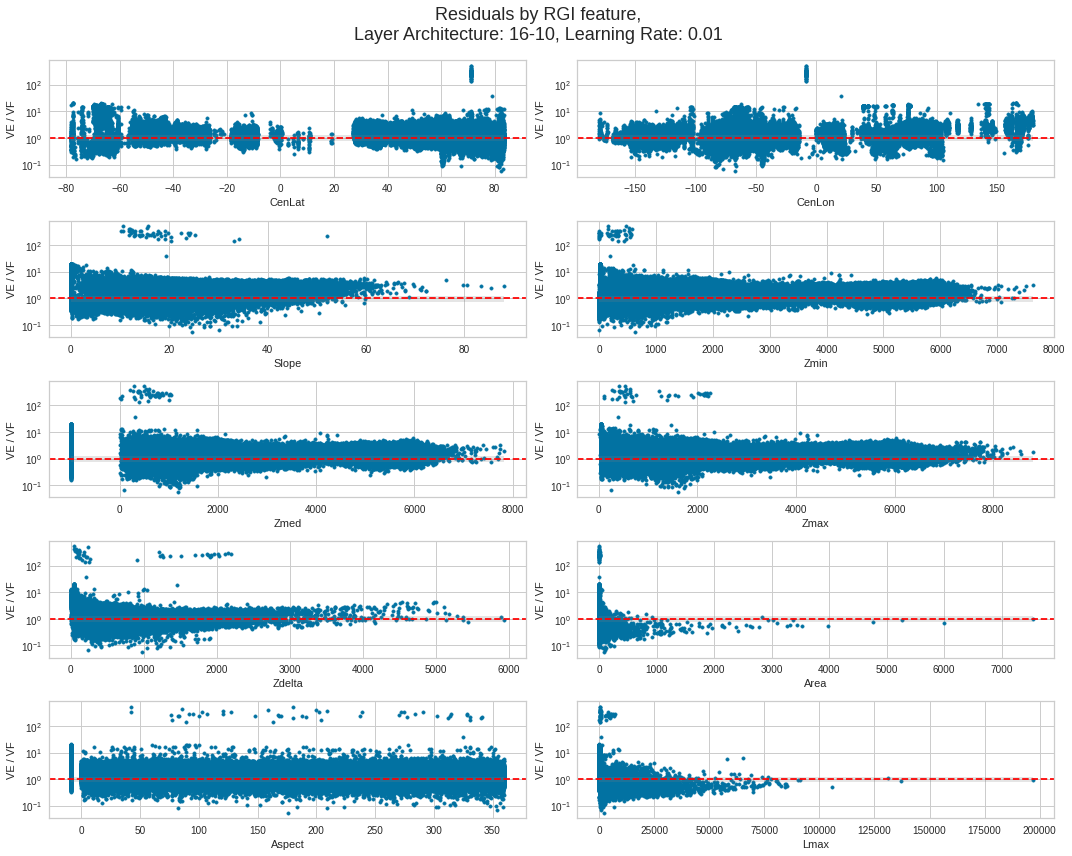

In [44]:
fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Residuals by RGI feature' + 
    ',\nLayer Architecture: ' + predictions['architecture'].loc[idx] +
    ', Learning Rate: ' + predictions['learning rate'].loc[idx], fontsize=18, y=0.99)
fig.patch.set_facecolor('w')
dft = ref[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Zdelta',
    'Area',
    'Aspect',
    'Lmax',

]]
for n, variable in enumerate(dft):
    ax = plt.subplot(5, 2, n + 1)
    plt.subplots_adjust(hspace=0.5)
    ax.set_ylabel('VE / VF')
    ax.set_xlabel(variable)
    ax.set_yscale('log')
    plt.scatter(
        dft[variable],
        ref['VE / VF'],
        marker = '.'
    )
    ax.fill_between(
        x = (
            dft[variable].min(), dft[variable].max()
        ),
        y1 = 1.25,
        y2 = 0.75,
        facecolor = 'gray',
        alpha = 0.2
    )
    plt.axhline(y = 1.00, color = 'red', linestyle = '--')

plt.tight_layout()

KeyError: "None of [Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',\n       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],\n      dtype='object')] are in the [columns]"

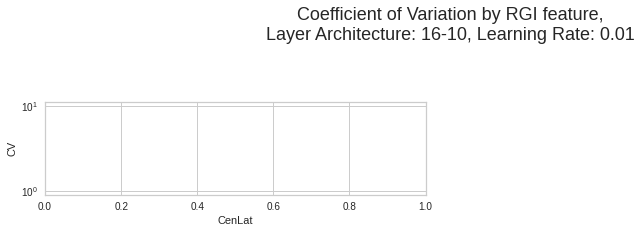

In [45]:
fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Coefficient of Variation by RGI feature' + 
    ',\nLayer Architecture: ' + predictions['architecture'].loc[idx] +
    ', Learning Rate: ' + predictions['learning rate'].loc[idx], fontsize=18, y=0.99)
fig.patch.set_facecolor('w')
dft = ref[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Zdelta',
    'Area',
    'Aspect',
    'Lmax',

]]

for n, variable in enumerate(dft):

    ax = plt.subplot(5, 2, n + 1)
    plt.subplots_adjust(hspace=0.5)
    ax.set_ylabel('CV')
    ax.set_xlabel(variable)
    ax.set_yscale('log')
    plt.scatter(
        dft[variable],
        (ref[['0', '1', '2', '3','4','5','6','7','8','9','10',
          '11','12','13','14','15','16','17','18','19','20',
          '21','22','23','24']].std(axis = 1)) / ref[['0', '1', '2', '3','4','5','6','7','8','9','10',
          '11','12','13','14','15','16','17','18','19','20',
          '21','22','23','24']].mean(axis = 1) ,
        marker = '.'
    )
    ax.fill_between(
        x = (
            dft[variable].min(), dft[variable].max()
        ),
        y1 = 1.25,
        y2 = 0.75,
        facecolor = 'gray',
        alpha = 0.2
    )
    plt.axhline(y = 1.00, color = 'red', linestyle = '--')

plt.tight_layout()

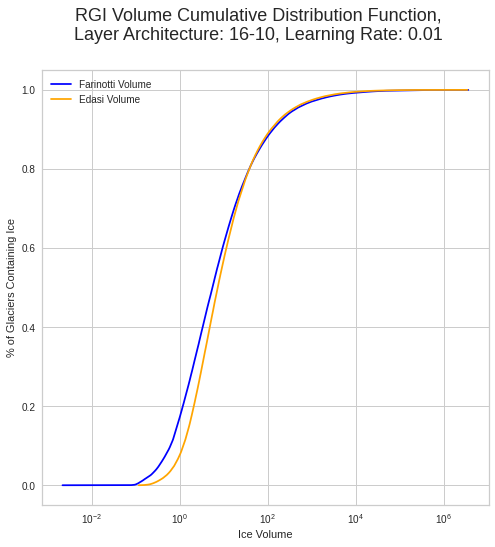

In [46]:
data_1 = ref['Farinotti Mean Thickness'] * ref['Area']
data_2 = ref['Edasi Mean Thickness'] * ref['Area']
#sort data


x_1 = np.sort(data_1)
# x = data_1
#calculate CDF values
y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)


x_2 = np.sort(data_2)
# x = data
#calculate CDF values
y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

#plot CDF
fig, ax = plt.subplots(1,1,figsize=(8, 8))

plt.subplots_adjust(hspace=0.5)

plt.suptitle('RGI Volume Cumulative Distribution Function' + 
    ',\nLayer Architecture: ' + predictions['architecture'].loc[idx] +
    ', Learning Rate: ' + predictions['learning rate'].loc[idx], fontsize=18, y=0.99)
fig.patch.set_facecolor('w')


plt.subplots_adjust(hspace=0.5)
plt.plot(
    x_1, 
    y_1,
    c = 'blue',
    label = 'Farinotti Volume'
    
)
plt.plot(
    x_2, 
    y_2,
    c = 'orange',
    label = 'Edasi Volume'
)
plt.legend()
ax.set_xscale('log')
ax.set_xlabel('Ice Volume')
ax.set_ylabel('% of Glaciers Containing Ice')
plt.savefig('figs/cdf/cdf.svg')

219671


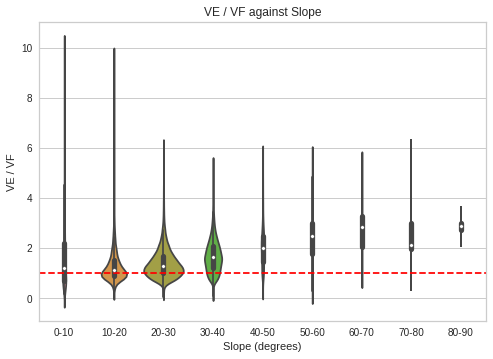

In [47]:
dfr = pd.DataFrame()
for i in range(0, 90, 10):
    dft = ref.loc[(ref['Slope'].between(i, i + 10)) & (ref['VE / VF'] <= 10)]
    dft['Slope (degrees)'] = str(i) + '-' + str(i + 10)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Slope (degrees)'],
    y = dfr['VE / VF'],
    scale = 'count',
    inner = 'box'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Slope')
print(len(dfr))
plt.savefig('figs/violin/slope.svg')

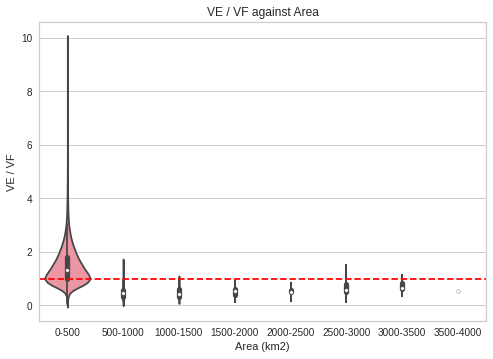

In [56]:
dfr = pd.DataFrame()
for i in range(0, 4000, 500):
    dft = ref.loc[(ref['Area'].between(i, i + 500)) & (ref['VE / VF'] <= 10)]
    dft['Area (km2)'] = str(i) + '-' + str(i + 500)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Area (km2)'],
    y = dfr['VE / VF'],
    inner = 'box',
    scale = 'count',
#     inner = None
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Area')
plt.savefig('figs/violin/area.svg')

Text(0.5, 1.0, 'VE / VF against Lmax (m)')

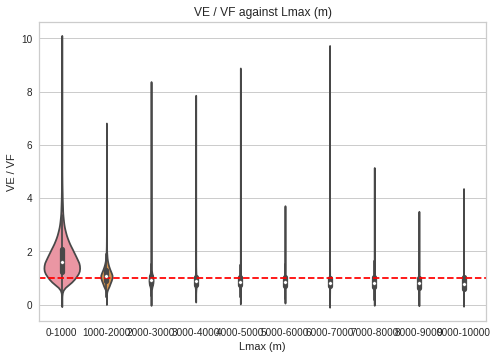

In [57]:
dfr = pd.DataFrame()
for i in range(0, 10000, 1000):
    dft = ref.loc[(ref['Lmax'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Lmax (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Lmax (m)'],
    y = dfr['VE / VF'],
    scale = 'count',
    inner = 'box'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Lmax (m)')

Text(0.5, 1.0, 'VE / VF against Zmin')

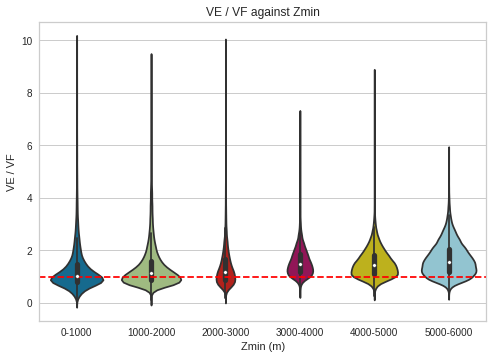

In [50]:
dfr = pd.DataFrame()
for i in range(0, 6000, 1000):
    dft = ref.loc[(ref['Zmin'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Zmin (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Zmin (m)'],
    y = dfr['VE / VF'],
    scale = 'count',
    
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Zmin')


Text(0.5, 1.0, 'VE / VF against Zmed')

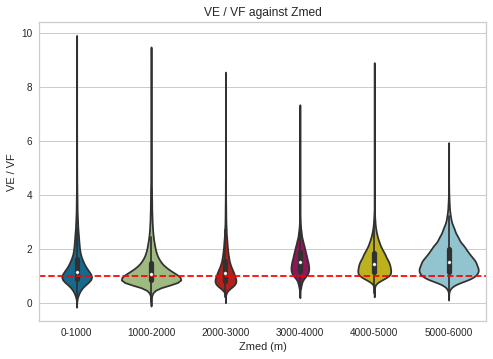

In [51]:
dfr = pd.DataFrame()
for i in range(0, 6000, 1000):
    dft = ref.loc[(ref['Zmed'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Zmed (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Zmed (m)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Zmed')

Text(0.5, 1.0, 'VE / VF against Zmax')

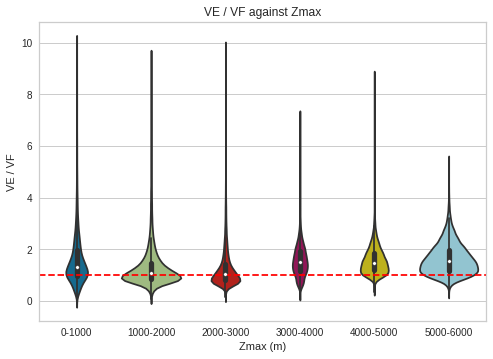

In [52]:
dfr = pd.DataFrame()
for i in range(0, 6000, 1000):
    dft = ref.loc[(ref['Zmax'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Zmax (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Zmax (m)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Zmax')

Text(0.5, 1.0, 'VE / VF against Zdelta')

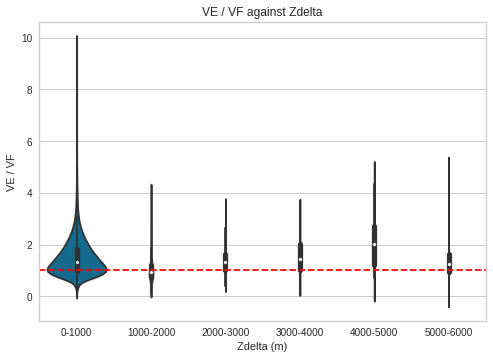

In [53]:
dfr = pd.DataFrame()
for i in range(0, 6000, 1000):
    dft = ref.loc[(ref['Zdelta'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Zdelta (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Zdelta (m)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Zdelta')


Text(0.5, 1.0, 'VE / VF against Cent Lat')

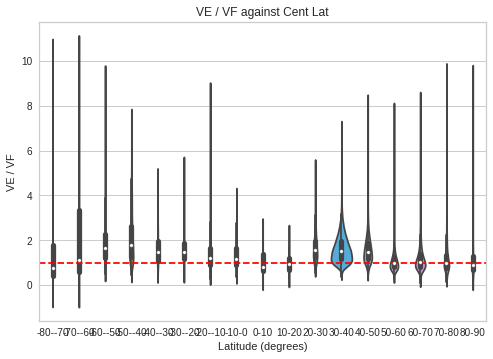

In [54]:
dfr = pd.DataFrame()
for i in range(-90, 100, 10):
    dft = ref.loc[(ref['CenLat'].between(i, i + 10)) & (ref['VE / VF'] <= 10)]
    dft['Latitude (degrees)'] = str(i) + '-' + str(i + 10)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Latitude (degrees)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Cent Lat')


Text(0.5, 1.0, 'VE / VF against Cent Lon')

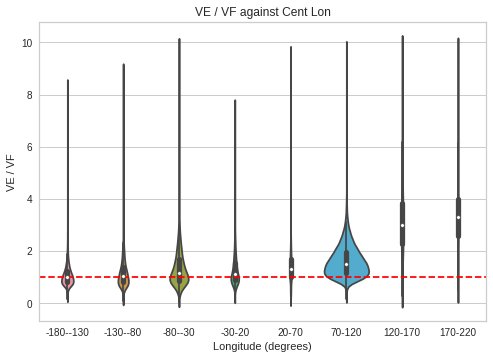

In [55]:
dfr = pd.DataFrame()
for i in range(-180, 190, 50):
    dft = ref.loc[(ref['CenLon'].between(i, i + 50)) & (ref['VE / VF'] <= 10)]
    dft['Longitude (degrees)'] = str(i) + '-' + str(i + 50)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Longitude (degrees)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Cent Lon')